In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


df = pd.read_csv('hotel_bookings.csv')

explorartory analysis

In [2]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

cleaning up dtypes

In [4]:
categorical_columns = ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'company', 'customer_type', 'reservation_status', 'reservation_status_date']
print(categorical_columns)

['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'company', 'customer_type', 'reservation_status', 'reservation_status_date']


In [5]:
for col in categorical_columns:
    df[col] = df[col].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  object 
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  object 
 6   arrival_date_day_of_month       119390 non-null  object 
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
unique_children = df['children'].unique()

print(unique_children)

[ 0.  1.  2. 10.  3. nan]


In [7]:
df['children'] = df['children'].fillna(0).astype('int64')

print(df['children'].dtype)

int64


In [8]:
unique_children = df['children'].unique()

print(unique_children)

[ 0  1  2 10  3]


addressing null values

In [9]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

country       488
agent       16340
company    112593
dtype: int64


In [10]:
df = df.drop(['country', 'company'], axis=1)

In [11]:
unique_agent = df['agent'].unique()

print(unique_agent)

[ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508.
 535. 302. 497. 187.  13.   7.  27.  14.  22.  17.  28.  42.  20.  19.
  45. 

In [12]:
null_agent_percentage = df['agent'].isnull().mean() * 100

print(null_agent_percentage)

13.686238378423655


C:\Users\BenBuczek\AppData\Local\Temp\ipykernel_19260\64095127.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


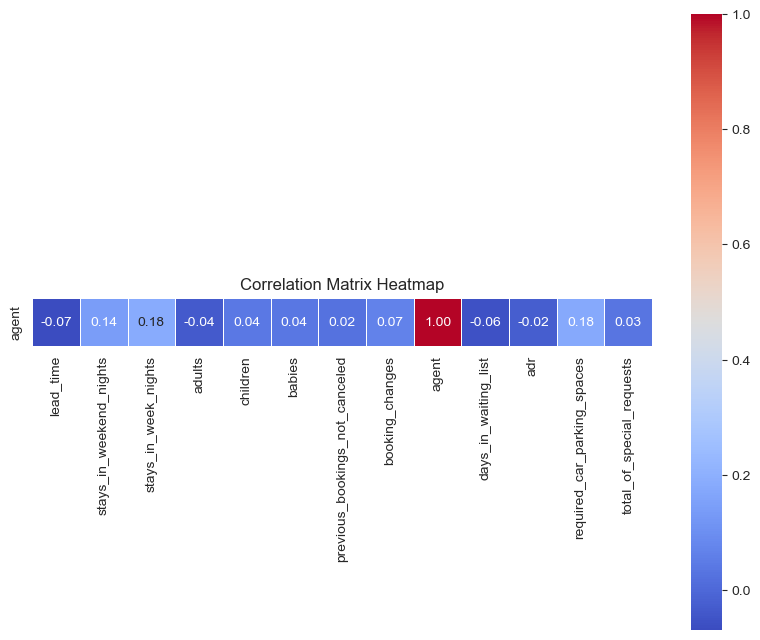

In [13]:
corr_matrix = df.corr()
agent_corr = corr_matrix[['agent']].transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(agent_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')

plt.show()

In [14]:
df = df.drop(['agent'], axis=1)

In [15]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


addressing values of zero

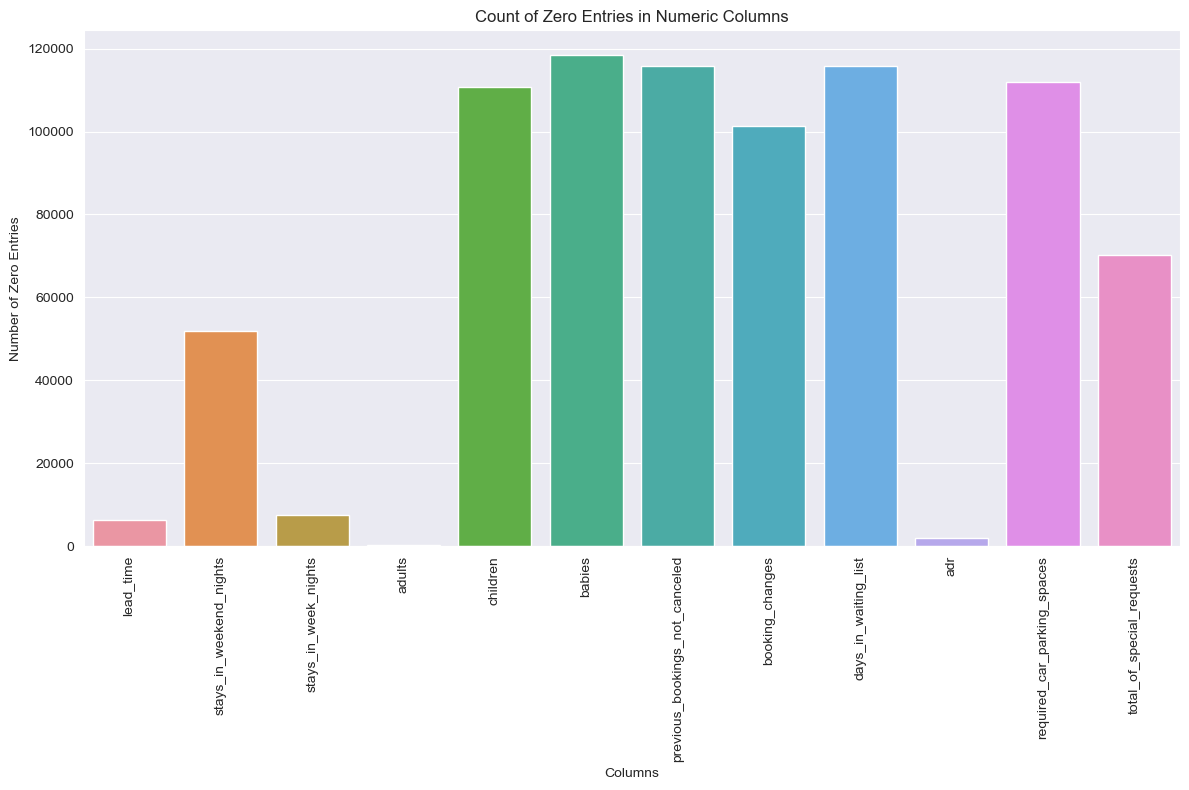

In [16]:
numeric_cols = df.select_dtypes(include=[np.number])

zero_counts_numeric = numeric_cols.apply(lambda x: (x == 0).sum())

plt.figure(figsize=(12, 8))
sns.barplot(x=zero_counts_numeric.index, y=zero_counts_numeric.values)

plt.title('Count of Zero Entries in Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Zero Entries')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [17]:
zero_adults_room_types = df[df['adults'] == 0]['reserved_room_type'].value_counts()

print(zero_adults_room_types)

B    211
A    131
D     23
E     17
P     12
F      5
G      3
C      1
Name: reserved_room_type, dtype: int64


In [18]:
average_adults = df[df['adults'] > 0].groupby('reserved_room_type')['adults'].median().astype(int)
df.loc[df['adults'] == 0, 'adults'] = df['reserved_room_type'].map(average_adults)

zero_adults_room_types = df[df['adults'] == 0]['reserved_room_type'].value_counts()
print(zero_adults_room_types)

Series([], Name: reserved_room_type, dtype: int64)


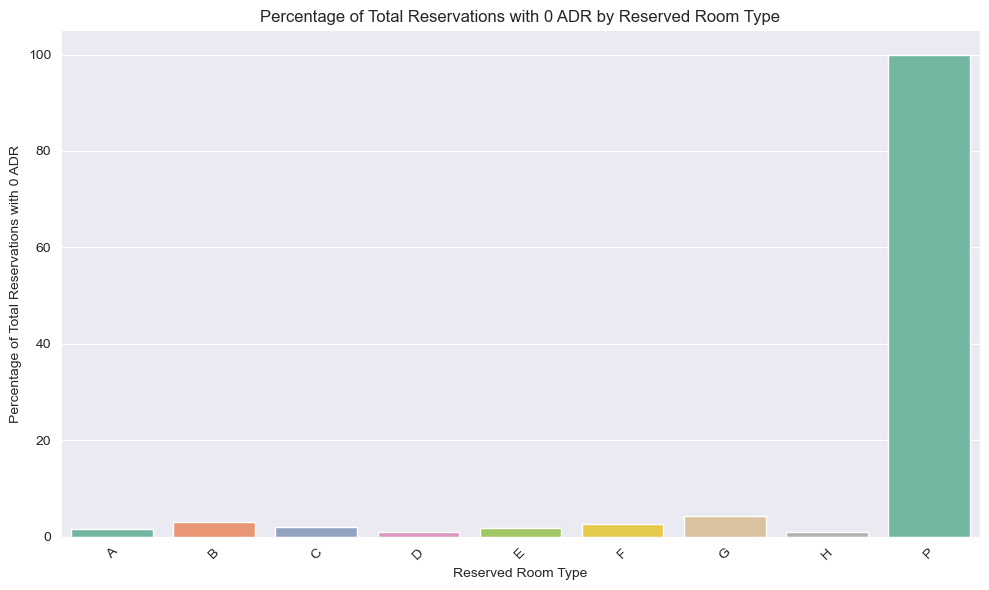

In [19]:
zero_adr_reservations = df[df['adr'] == 0]

total_reservations = df.groupby('reserved_room_type').size().reset_index(name='total_count')
zero_adr_counts = zero_adr_reservations.groupby('reserved_room_type').size().reset_index(name='zero_count')
zero_adr_percentages = pd.merge(total_reservations, zero_adr_counts, on='reserved_room_type')
zero_adr_percentages['percent_zero_adr'] = (zero_adr_percentages['zero_count'] / zero_adr_percentages['total_count']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='reserved_room_type', y='percent_zero_adr', data=zero_adr_percentages, palette='Set2')

plt.title('Percentage of Total Reservations with 0 ADR by Reserved Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Percentage of Total Reservations with 0 ADR')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [20]:
print (df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [21]:
df = df.drop(['arrival_date_year', 'assigned_room_type', 'reservation_status', 'reservation_status_date'], axis=1)

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119378.0,1.863141,0.569179,1.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0
booking_changes,119390.0,0.221124,0.652306,0.00,0.00,0.000,0.0,21.0
days_in_waiting_list,119390.0,2.321149,17.594721,0.00,0.00,0.000,0.0,391.0
adr,119390.0,101.831122,50.535790,-6.38,69.29,94.575,126.0,5400.0


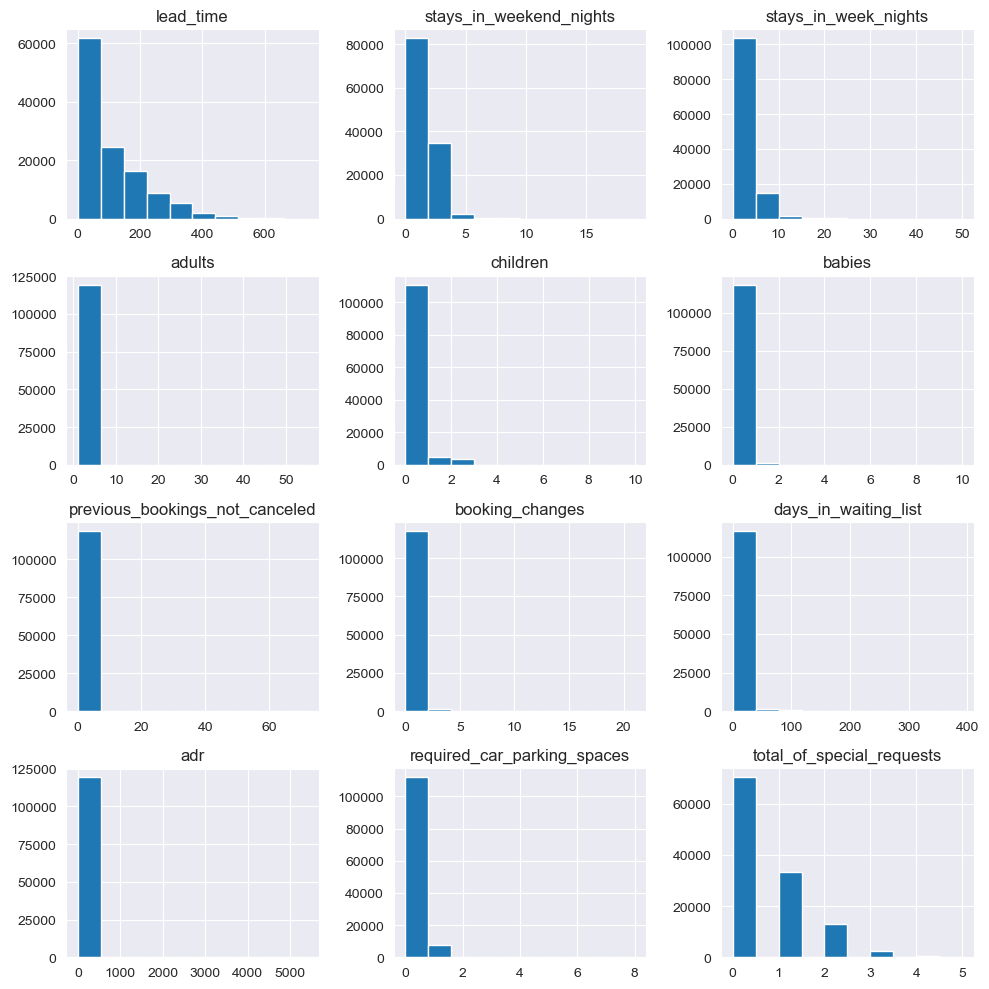

In [23]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_columns].hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

addressing outliers

In [24]:
negative_adr_count = (df['adr'] < 0).sum()
print(negative_adr_count)

1


In [25]:
average_adr = df[df['adr'] >= 0].groupby(['reserved_room_type', 'hotel', 'arrival_date_month'])['adr'].mean().reset_index(name='average_adr')
df = df.merge(average_adr, on=['reserved_room_type', 'hotel', 'arrival_date_month'], how='left')
df.loc[df['adr'] < 0, 'adr'] = df.loc[df['adr'] < 0, 'average_adr']
df.drop('average_adr', axis=1, inplace=True)

In [26]:
negative_adr_count = (df['adr'] < 0).sum()
print(negative_adr_count)

0


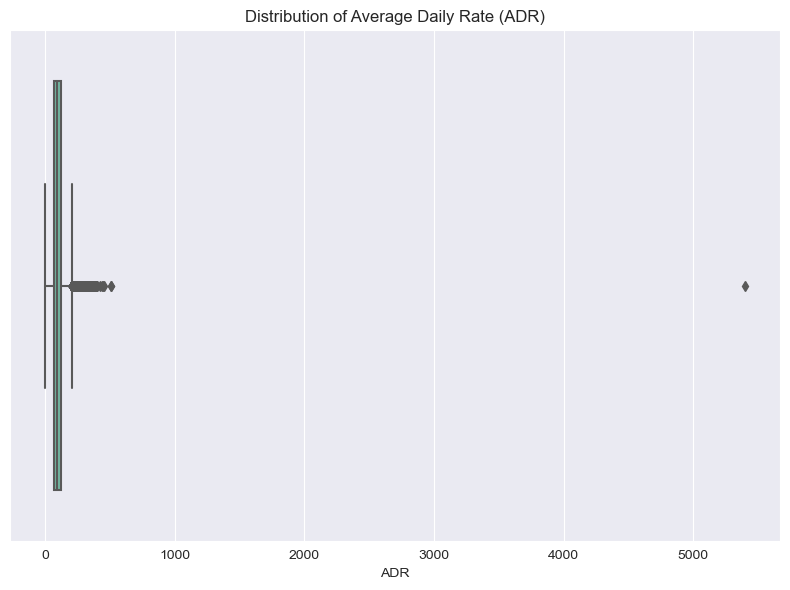

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['adr'], palette='Set2')
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('ADR')
plt.tight_layout()
plt.show()

In [28]:
df[df['adr'] == 5400].T

,48515
hotel,City Hotel
is_canceled,1
lead_time,35
arrival_date_month,March
arrival_date_week_number,13
arrival_date_day_of_month,25
stays_in_weekend_nights,0
stays_in_week_nights,1
adults,2.0
children,0


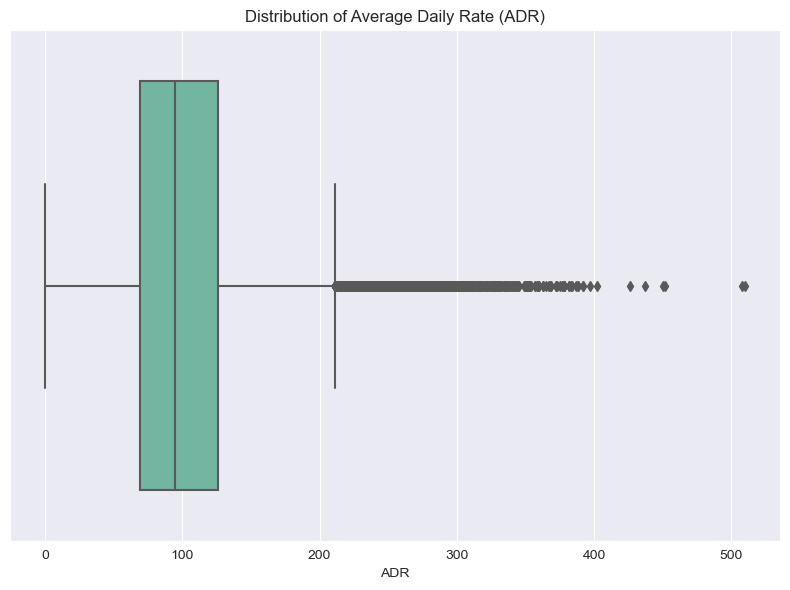

In [29]:
index_to_drop = df[df['adr'] == 5400].index

df = df.drop(index_to_drop)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['adr'], palette='Set2')
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('ADR')
plt.tight_layout()
plt.show()

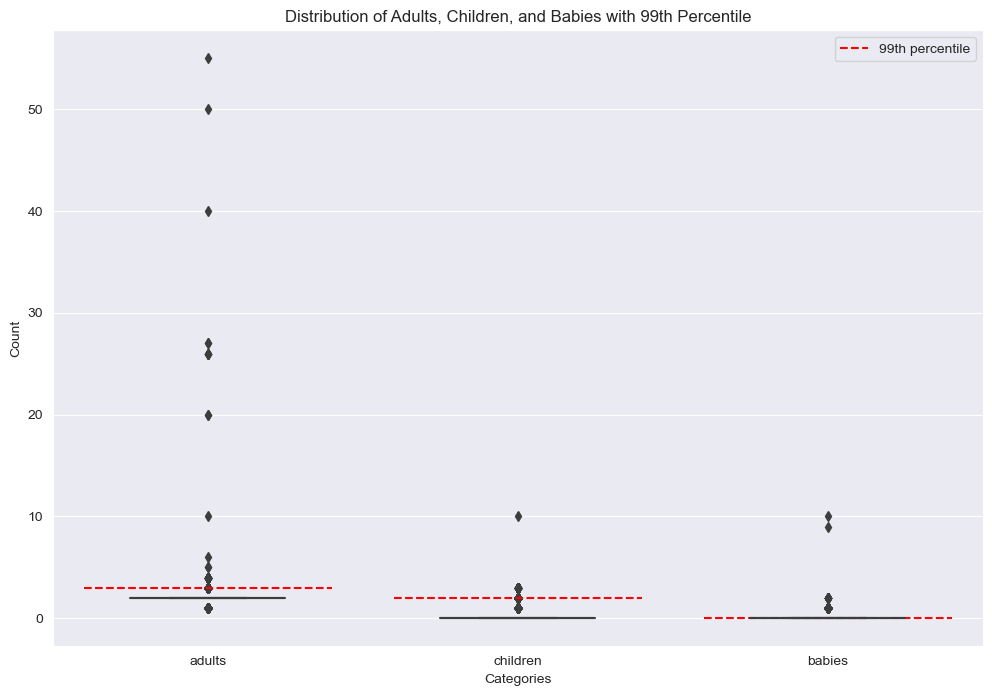

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['adults', 'children', 'babies']], width=0.5)
percentiles = df[['adults', 'children', 'babies']].quantile(0.99)

for i, col in enumerate(['adults', 'children', 'babies']):
    plt.hlines(percentiles[col], xmin=i - 0.4, xmax=i + 0.4, colors='red', linestyles='dashed', label='99th percentile' if i == 0 else "")


plt.title('Distribution of Adults, Children, and Babies with 99th Percentile')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.legend()
plt.show()

In [31]:
unique_adults = df['adults'].unique()
unique_children = df['children'].unique()
unique_babies = df['babies'].unique()

print("Unique values in 'adults' column:", unique_adults)
print("Unique values in 'children' column:", unique_children)
print("Unique values in 'babies' column:", unique_babies)


Unique values in 'adults' column: [ 2.  1.  3.  4. 40. 26. 50. 27. 55. 20.  6.  5. 10. nan]
Unique values in 'children' column: [ 0  1  2 10  3]
Unique values in 'babies' column: [ 0  1  2 10  9]


In [32]:
df['adults'].fillna(0, inplace=True)

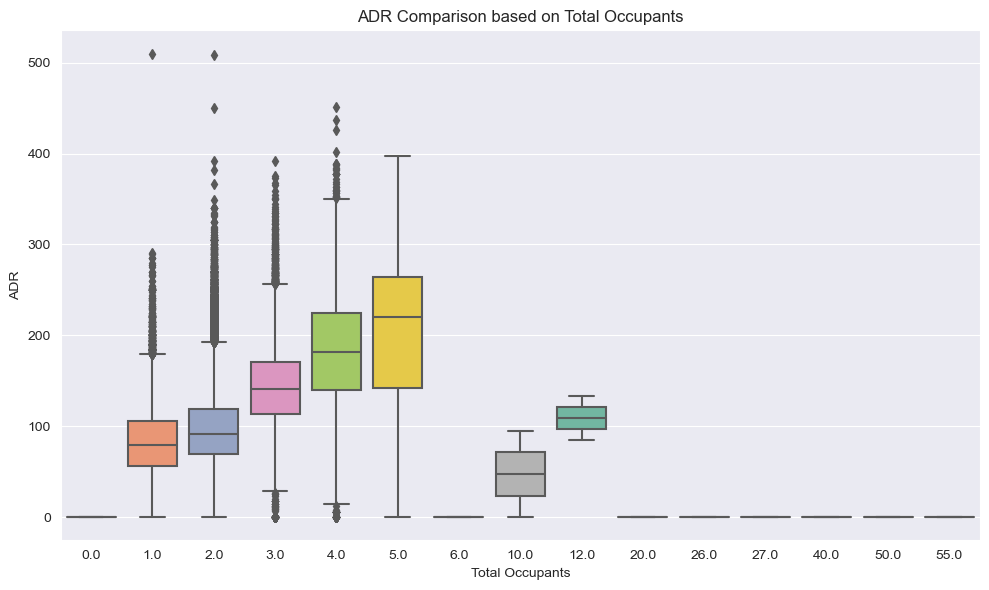

In [33]:
df['total_occupants'] = df['adults'] + df['children'] + df['babies']

plt.figure(figsize=(10, 6))
sns.boxplot(x='total_occupants', y='adr', data=df, palette='Set2')
plt.title('ADR Comparison based on Total Occupants')
plt.xlabel('Total Occupants')
plt.ylabel('ADR')
plt.tight_layout()
plt.show()

In [34]:
def handle_outliers(row):
    if row['adults'] >= 6:
        row['adults'] = df[df['reserved_room_type'] == row['reserved_room_type']]['adults'].median()
    if row['children'] >= 6:
        row['children'] = df[df['reserved_room_type'] == row['reserved_room_type']]['children'].median()
    if row['babies'] >= 6:
        row['babies'] = df[df['reserved_room_type'] == row['reserved_room_type']]['babies'].median()
    return row

df = df.apply(handle_outliers, axis=1)

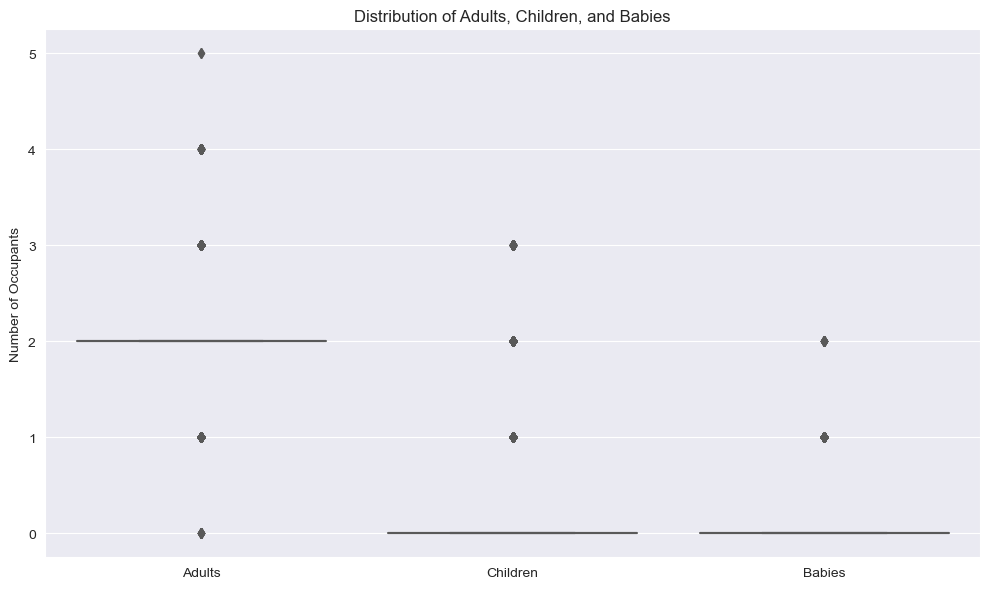

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['adults', 'children', 'babies']], orient='v', palette='Set2')
plt.title('Distribution of Adults, Children, and Babies')
plt.ylabel('Number of Occupants')
plt.xticks([0, 1, 2], ['Adults', 'Children', 'Babies'])
plt.tight_layout()
plt.show()

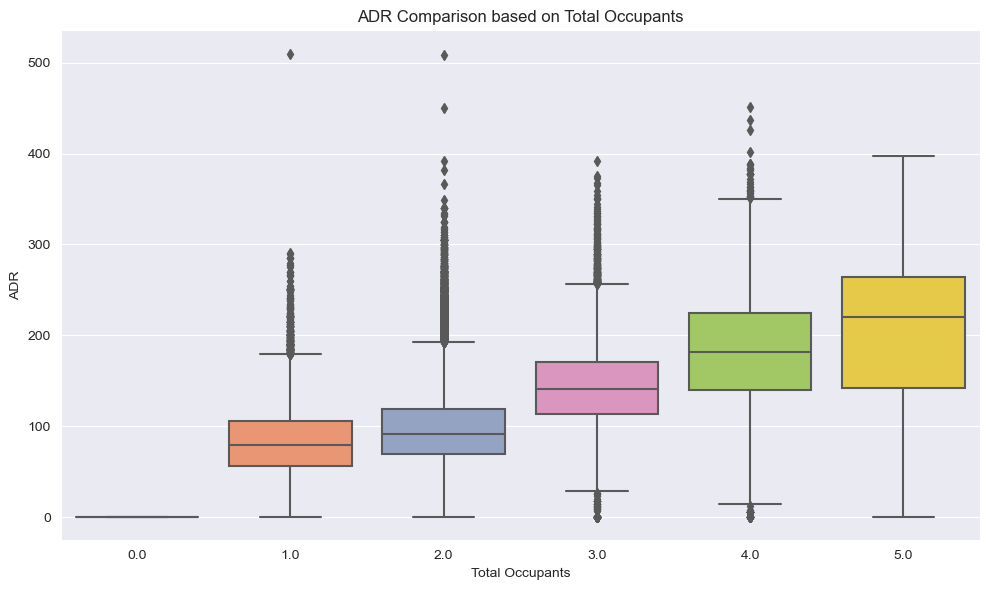

In [36]:
df['total_occupants'] = round(df['adults'] + df['children'] + df['babies'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='total_occupants', y='adr', data=df, palette='Set2')
plt.title('ADR Comparison based on Total Occupants')
plt.xlabel('Total Occupants')
plt.ylabel('ADR')
plt.tight_layout()
plt.show()

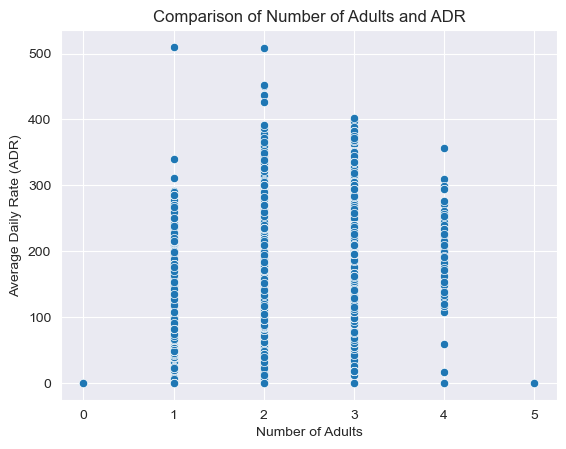

In [37]:
sns.scatterplot(x='adults', y='adr', data=df)
plt.title('Comparison of Number of Adults and ADR')
plt.xlabel('Number of Adults')
plt.ylabel('Average Daily Rate (ADR)')

plt.show()

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119389.0,0.370411,0.482917,0.0,0.00,0.00,1.0,1.0
lead_time,119389.0,104.011994,106.863358,0.0,18.00,69.00,160.0,737.0
arrival_date_week_number,119389.0,27.165292,13.605134,1.0,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119389.0,15.798164,8.780826,1.0,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119389.0,0.927606,0.998614,0.0,0.00,1.00,2.0,19.0
stays_in_week_nights,119389.0,2.500314,1.908289,0.0,1.00,2.00,3.0,50.0
adults,119389.0,1.859962,0.477329,0.0,2.00,2.00,2.0,5.0
children,119389.0,0.103804,0.397526,0.0,0.00,0.00,0.0,3.0
babies,119389.0,0.007790,0.089333,0.0,0.00,0.00,0.0,2.0
is_repeated_guest,119389.0,0.031912,0.175768,0.0,0.00,0.00,0.0,1.0


In [39]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119389,2,City Hotel,79329
arrival_date_month,119389,12,August,13877
meal,119389,5,BB,92309
market_segment,119389,8,Online TA,56477
distribution_channel,119389,5,TA/TO,97869
reserved_room_type,119389,10,A,85993
deposit_type,119389,3,No Deposit,104641
customer_type,119389,4,Transient,89612


encoding variables

In [40]:
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

In [41]:
df.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,7,27,1,0,0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,737,7,27,1,0,0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,7,7,27,1,0,1,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,13,7,27,1,0,1,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,7,27,1,0,2,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


train, test, split

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop('is_canceled', axis=1)
y = df['is_canceled'] 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set - Features:", X_train.shape, " Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, " Target:", y_test.shape)

Training set - Features: (95511, 48)  Target: (95511,)
Testing set - Features: (23878, 48)  Target: (23878,)


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2']  
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.8173213837004775
Precision: 0.7986820002584313
Recall: 0.6879243183082916
F1-score: 0.7391772303276728
ROC-AUC Score: 0.7916557064582483


In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2'] 
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
best_rf_clf.fit(X_train, y_train)

y_pred = best_rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8637658095317866
Precision: 0.8675301359322903
Recall: 0.7529215358931552
F1-score: 0.8061729130667938
ROC-AUC Score: 0.8417800454595034


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.05, 0.1, 0.2],  
    'max_depth': [3, 5, 7],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2']  
}

grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_gb_clf = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_clf.fit(X_train, y_train)

y_pred = best_gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8476840606415947
Precision: 0.848267778067205
Recall: 0.7248747913188648
F1-score: 0.781731981035828
ROC-AUC Score: 0.8233250610055682


In [49]:
pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.1/99.8 MB 3.3 MB/s eta 0:00:31
                                              0.3/99.8 MB 2.9 MB/s eta 0:00:34
                                              0.4/99.8 MB 3.0 MB/s eta 0:00:34
                                              0.8/99.8 MB 4.7 MB/s eta 0:00:22
                                              1.2/99.8 MB 5.6 MB/s eta 0:00:18
                                              1.4/99.8 MB 5.4 MB/s eta 0:00:19
                                              1.7/99.8 MB 5.3 MB/s eta 0:00:19
                                              1.9/99.8 MB 5.3 MB/s eta 0:00:19
                                              2.2/99.8 MB 5.5 MB/s eta 0:00:18
     -                                        2.5/99.8 MB 5.5 MB/s eta 0:00:18
     -                                        2.7/99.8 MB 5.4 MB/s eta 0:00:19
     -                                        2.9/99.8 MB 5

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb_clf = XGBClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_xgb_clf = XGBClassifier(**best_params, random_state=42)
best_xgb_clf.fit(X_train, y_train)

y_pred = best_xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)

Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.845841360247927
Precision: 0.8540720961281709
Recall: 0.7119643850862548
F1-score: 0.7765705614567526
ROC-AUC Score: 0.8192871008893304


random forest performs the best. 

feature importance for the random forest

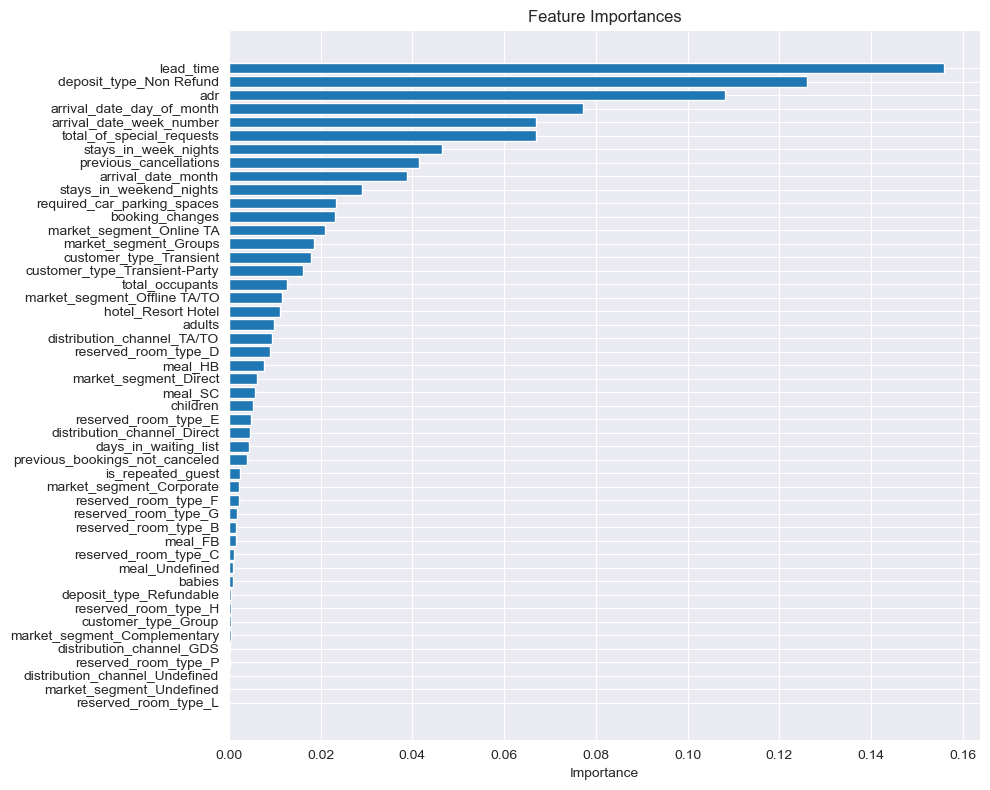

In [55]:
feature_importances = best_rf_clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance')

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()